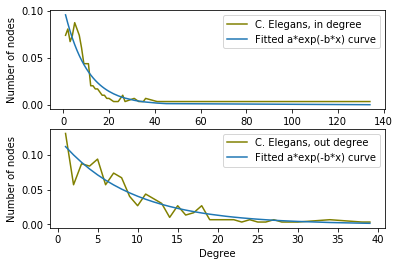

In [4]:
# %load compute_celegans_stats
import snap
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

def compute_HITS(Graph):
    '''
    :param Graph: the graph to compute HITS on
    :return:
        1. list of tuple (hub_score, node_id) in descending order
        2. list of tuple (authority_score, node_id) in descending order
    '''
    NIdHubH = snap.TIntFltH()   # placeholder for hub
    NIdAuthH = snap.TIntFltH()  # placeholder for authority
    snap.GetHits(Graph, NIdHubH, NIdAuthH)

    listAuth = []
    listHub = []

    for item in NIdHubH:
        listHub.append((NIdHubH[item], item))
    for item in NIdAuthH:
        listAuth.append((NIdAuthH[item], item))

    return sorted(listHub)[::-1], sorted(listAuth)[::-1]

def compute_pagerank(Graph):
    '''
    :param Graph: the graph to compute pagerank on
    :return: a list of tuple (pagerank_score, node_id) in descending order
    '''
    PRankH = snap.TIntFltH()
    snap.GetPageRank(Graph, PRankH)
    listPageRank = []
    for item in PRankH:
        listPageRank.append((PRankH[item], item))

    return sorted(listPageRank)[::-1]


def get_clustering_coefficient(Graph):
    return snap.GetClustCf (Graph, -1)

def get_in_degree_distribution(Graph):
    DegToCntV = snap.TIntPrV()
    snap.GetInDegCnt(Graph, DegToCntV)
    num_node = Graph.GetNodes()
    XI, YI = [], []
    for item in DegToCntV:
        if item.GetVal1() == 0 or item.GetVal2() == 0:
            continue
        XI.append(item.GetVal1())
        YI.append(item.GetVal2() * 1.0 / num_node)
    return XI, YI

def get_out_degree_distribution(Graph):
    DegToCntV = snap.TIntPrV()
    snap.GetOutDegCnt(Graph, DegToCntV)
    num_node = Graph.GetNodes()
    XO, YO = [], []
    for item in DegToCntV:
        if item.GetVal1() == 0 or item.GetVal2() == 0:
            continue
        XO.append(item.GetVal1())
        YO.append(item.GetVal2() * 1.0 / num_node)
    return XO, YO
    
def draw_degree_distribution(Graph, Graph1, Graph2, logAxis = True):
    XI, YI = get_in_degree_distribution(Graph)
    XO, YO = get_out_degree_distribution(Graph)
    X1, Y1 = get_out_degree_distribution(Graph1) # Both are undirected graphs, so can use either in-degree or out-degree
    X2, Y2 = get_out_degree_distribution(Graph2)

    l0, = plt.loglog(XI, YI, '-', color = 'blue', label = 'Degree Distribution (log)')
    l1, = plt.loglog(XO, YO, '-', color = 'green', label = 'Degree Distribution (log)')
    l2, = plt.loglog(X1, Y1, '-', color = 'red', label = 'Degree Distribution (log)')
    l3, = plt.loglog(X2, Y2, '-', color = 'orange', label = 'Degree Distribution (log)')
    plt.legend([l0, l1, l2, l3], ['C. Elegans, in degree', 'C. Elegans, out degree', 'Erdos-Renyi', 'Preferential Attachment'])
    plt.xlabel('Degree (log)')
    plt.ylabel('Number of nodes (log)')
    plt.show()


def fit_deg_dist(Graph):

    def func(x, a, b):
        return a * np.exp(-b * x)
    DegToCntV = snap.TIntPrV()

    X, Y = get_in_degree_distribution(Graph)

    plt.subplot(2, 1, 1)
    X = np.array(X)
    Y = np.array(Y)
    popt, pcov = curve_fit(func, X, Y)
    a, b = popt
    l0, = plt.plot(X, Y, color = 'olive', label = 'Degree Distribution')
    l1, = plt.plot(X, [func(x, a, b) for x in X])
    plt.legend([l0, l1], ['C. Elegans, in degree', 'Fitted a*exp(-b*x) curve'])
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    
    X, Y = get_out_degree_distribution(Graph)

    plt.subplot(2, 1, 2)
    X = np.array(X)
    Y = np.array(Y)
    popt, pcov = curve_fit(func, X, Y)
    a, b = popt
    l0, = plt.plot(X, Y, color = 'olive', label = 'Degree Distribution')
    l1, = plt.plot(X, [func(x, a, b) for x in X])
    plt.legend([l0, l1], ['C. Elegans, out degree', 'Fitted a*exp(-b*x) curve'])
    plt.xlabel('Degree')
    plt.ylabel('Number of nodes')
    
    plt.show()

def get_diameter(Graph):
    NTestNodes = 302
    return snap.GetBfsFullDiam(Graph, NTestNodes, True)

Graph = snap.LoadEdgeList(snap.PNGraph, "../data/celegans_n306.txt", 0, 1)
Graph1 = snap.LoadEdgeList(snap.PUNGraph, "../data/Erdos-Renyi.txt", 0, 1)
Graph2 = snap.LoadEdgeList(snap.PUNGraph, "../data/PrefAttach.txt", 0, 1)

# draw_degree_distribution(Graph, Graph1, Graph2)

fit_deg_dist(Graph)


# print get_clustering_coefficient(Graph)

# HITS = compute_HITS(Graph)
# print HITS[0][0], HITS[1][0]
# print compute_pagerank(Graph)[0]



In [5]:
#For large degree nodes, do they connect to other large degree nodes or do they connect to small degree nodes?
#Define small deg := nodes with degree 1; large degree: nodes with degree > 30
OutDegV = snap.TIntPrV()
snap.GetNodeOutDegV(Graph, OutDegV)
smallOutDegNodes = []
medOutDegNodes = []
largeOutDegNodes = []

for item in OutDegV:
    if item.GetVal2() <= 1:
        smallOutDegNodes.append(item.GetVal1())
    elif item.GetVal2() > 30:
        largeOutDegNodes.append(item.GetVal1())
    else:
        medOutDegNodes.append(item.GetVal1())
        
InDegV = snap.TIntPrV()
snap.GetNodeInDegV(Graph, InDegV)
smallInDegNodes = []
medInDegNodes = []
largeInDegNodes = []

for item in InDegV:
    if item.GetVal2() <= 1:
        smallInDegNodes.append(item.GetVal1())
    elif item.GetVal2() > 30:
        largeInDegNodes.append(item.GetVal1())
    else:
        medInDegNodes.append(item.GetVal1())
        
print len(smallInDegNodes), len(medInDegNodes), len(largeInDegNodes)
print len(smallOutDegNodes), len(medOutDegNodes), len(largeOutDegNodes)
# print largeDegNodes


49 239 9
42 251 4


In [4]:
# %load community_detection
import networkx as nx
import itertools
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.efficiency import global_efficiency

def read_graph_file(file_path):
    edge_list = []
    f = open(file_path)
    line = f.readline()
    while line:
        new_edge = line.split()
        print new_edge[0]
        new_edge[0] = int(new_edge[0])
        new_edge[1] = int(new_edge[1])
        # new_edge[2] = int(new_edge[2])
        edge_list.append(tuple(new_edge))
        line = f.readline()
    return edge_list

def run_girvan_newman(Graph):
    comp = girvan_newman(Graph)
    k = 20
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    for communities in limited:
        print(tuple(sorted(c) for c in communities))


# G_elegans = nx.DiGraph()
# G_elegans.add_weighted_edges_from(read_graph_file("../data/celegans_n306.txt"))
# run_girvan_newman(G_elegans)


G_elegans = nx.Graph()
G_elegans.add_edges_from(read_graph_file("../data/Erdos-Renyi.txt"))
print global_efficiency(G_elegans)

#


ValueError: invalid literal for int() with base 10: '#'